In [301]:
from numpy import dot
def kf_predict(X, P, A, Q, B, U):
 X = dot(A, X) + dot(B, U)
 P = dot(A, dot(P, A.T)) + Q
 return(X,P) 

In [302]:
from numpy import dot, sum, tile, linalg
from numpy.linalg import inv,det  
import pandas as pd

In [303]:
df=pd.read_csv('weather-raw_2020.csv')
df=df.fillna(0)
df.isnull().sum()

Date                              0
Temp                              0
Humidity (%)                      0
Dew Point (Celcius * 10)          0
Pressure (mBar)                   0
Mean wind speed (knots * 10)      0
Average wind bearing (degrees)    0
Sunshine (hours * 100)            0
Rainfall (mm * 1000)              0
dtype: int64

In [304]:
df['Date']=pd.to_datetime(df['Date'])


In [305]:
df=df.drop(['Date'],axis=1)
df.head(3)

,Temp,Humidity (%),Dew Point (Celcius * 10),Pressure (mBar),Mean wind speed (knots * 10),Average wind bearing (degrees),Sunshine (hours * 100),Rainfall (mm * 1000)
0,30.5,36.0,140.0,1013.0,13.0,315.0,50,0
1,31.1,41.0,163.0,1013.0,12.0,315.0,51,0
2,32.2,43.0,181.0,1013.0,2.0,315.0,50,0


In [306]:
#frames = [df['Temp'], df['Humidity (%)'], df['Dew Point (Celcius * 10)'],df['Pressure (mBar)']]
frames = [df['Temp'], df['Humidity (%)']]

In [307]:
result = pd.concat(frames, axis=1)
result.head(2)

,Temp,Humidity (%)
0,30.5,36.0
1,31.1,41.0


In [308]:
Y_val=result.T.values
#Y.reshape((2, 1))
#Y=Y_val[:,0]
Y=Y_val[:,0].reshape((2,1))

In [309]:
def kf_update(X, P, Y, H, R):
 IM = dot(H, X)
 IS = R + dot(H, dot(P, H.T))
 K = dot(P, dot(H.T, inv(IS)))
 X = X + dot(K, (Y-IM))
 P = P - dot(K, dot(IS, K.T))
 LH = gauss_pdf(Y, IM, IS)
 return (X,P,K,IM,IS,LH) 

In [310]:
def gauss_pdf(X, M, S):
 if M.shape[1] == 1:
  DX = X - tile(M, X.shape[1])
  E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
  E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
  P = exp(-E)
 elif X.shape()[1] == 1:
  DX = tile(X, M.shape[1])- M
  E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
  E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
  P = exp(-E)
 else: 
  DX = X-M
  E = 0.5 * dot(DX.T, dot(inv(S), DX))
  E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
  P = exp(-E)
 return (P[0],E[0])

In [311]:
from numpy import *
import numpy as np
from numpy.linalg import inv
#time step of mobile movement
dt = 0.1
# Initialization of state matrices
X = array([[30.0], [36.0], [140.1], [1013.0]])
P = diag((0.01, 0.01, 0.01, 0.01))
A = array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0,\
 1]])
Q = np.eye(4, dtype=int)
B = np.eye(4, dtype=int)
U = zeros((X.shape[0],1))

In [312]:
X.shape

(4, 1)

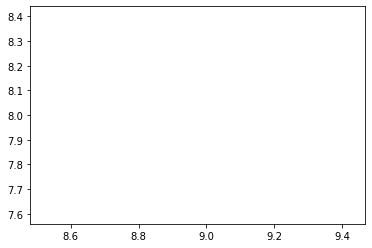

In [313]:
from numpy.random import randn
import matplotlib.pyplot as plt
# Measurement matrices


H = array([[1, 0, 0, 0], [0, 1, 0, 0]])
R = eye(Y.shape[0])
# Number of iterations in Kalman Filter
x_pos=[]
y_pos=[]
N_iter = 50
# Applying the Kalman Filter
for i in range(len(result)):
 (X, P) = kf_predict(X, P, A, Q, B, U)
 (X, P, K, IM, IS, LH) = kf_update(X, P, Y, H, R)
 Y=Y_val[:,i].reshape((2,1))
x_pos.append(float(X[0]))
y_pos.append(float(Y[0]))
plt.plot(x_pos,y_pos)